In [13]:
#dataframe inicial
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
autos_df = pd.read_csv("argentina_cars.csv")
autos_df

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,57500,dólares


<Axes: ylabel='brand'>

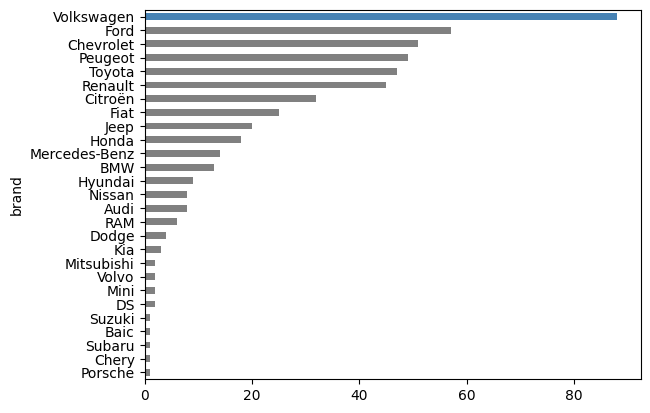

In [2]:
#Volkswagen marca de auto usado mas vendida
brandcount = autos_df.brand.value_counts()
sorted_brandcount = brandcount.sort_values(ascending=True)
custom_colors =  ['grey'] * (len(brandcount) - 1) + ['SteelBlue']  
sorted_brandcount.plot(kind = 'barh', color=custom_colors)


In [3]:
#filtrado de la marca volkwagen
vk = autos_df["brand"] == "Volkswagen"
volkswagen = autos_df[vk]

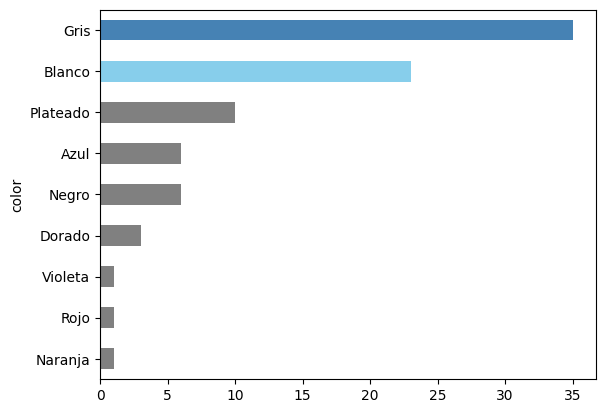

In [4]:
#color predominante de la linea volkwagen
vkcolorcount = volkswagen.color.value_counts()
sort_vkcolorcount = vkcolorcount.sort_values(ascending=True)
colors =  ['grey'] * (len(vkcolorcount) - 2) + ['SkyBlue'] + ['SteelBlue']  
sort_vkcolorcount.plot(kind='barh', color=colors)
vkcount = volkswagen.model.value_counts()
sort_vkcount = vkcount.sort_values(ascending=True)

<Axes: ylabel='model'>

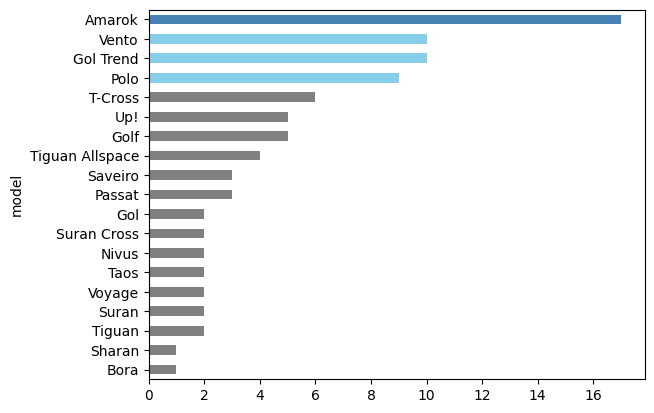

In [5]:
#grafica de lineas de autos volkwagen 
vkcount = volkswagen.model.value_counts()
sort_vkcount = vkcount.sort_values(ascending=True)
colors =  ['grey'] * (len(vkcount) -4) + ['SkyBlue'] * 3  + ['SteelBlue']  
sort_vkcount.plot(kind='barh', color=colors)

In [6]:
#tabla dinamica sobre los modelos publicados de cada linea por año
specific_brands = ['Amarok','Vento','Gol Trend','Polo']

vk = autos_df[autos_df['model'].isin(specific_brands)]

vkfilter = vk.filter(items = ['brand','model','year'], axis = 1)
cantidad = vkfilter.groupby(['year', 'model']).size().reset_index(name='cantidad')
pivot_table = pd.pivot_table(cantidad, values='cantidad', index='model', columns='year', fill_value=0)
pivot_table = pivot_table.sort_index(axis=1, ascending=False)
pivot_table


year,2022,2021,2019,2018,2017,2016,2015,2014,2013,2012,2011,2009
model,,,,,,,,,,,,
Amarok,1.0,0.0,4.0,4.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0
Gol Trend,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
Polo,1.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vento,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0


In [10]:
#posibles causas de reventa de amarok 2016 a 2022
#https://www.problemasyfallas.com/volkswagen/amarok/

In [12]:
#parseo del webscrapping de la pagina problemas y fallas
try:  
    source = requests.get('https://www.problemasyfallas.com/volkswagen/amarok')
    source.raise_for_status()

    soup = BeautifulSoup(source.text,'html.parser')
    fallas = soup.find('div', class_="model-recalls__carts").find_all('li')
             

except Exception as e:
    print(e)   

In [9]:
# filtro para obtener los años de la linea Amarok
año_list = []  
modelos = soup.find_all('a', class_='model-recalls__cart-title')
modelos_titulos = [title.text.strip() for title in modelos]

# bucle para obtener lista de años de la linea Amarok
for titulo in modelos_titulos:
    palabras = titulo.split()
    año = palabras[0]  
    año_list.append(año)

problemas_list = []
num_fallas_list = []
# bucle para obtener la cantidad y detalle de problemas del modelo de ese año
for i in range(0, len(fallas), 2):
    problema = fallas[i].find('span').text.strip()
    num_fallas = fallas[i + 1].find('span').text.strip()
    problemas_list.append(problema)
    num_fallas_list.append(num_fallas)

data = {
    "Año": año_list,
    "Número de fallas": num_fallas_list,
    "Problemas": problemas_list
    
}
#dataframe final
df = pd.DataFrame(data)
df.sort_values(by="Número de fallas", ascending=False, inplace=True)

df

,Año,Número de fallas,Problemas
3,2017,5,"Asientos, Bolsas de aire, Caja, Otros, Ruedas"
4,2016,5,"Asientos, Bolsas de aire, Caja, Otros, Ruedas"
2,2018,3,"Asientos, Otros, Ruedas"
5,2015,3,"Caja, Frenos, Otros"
6,2014,3,"Aire acondicionado, Frenos, Otros"
7,2013,3,"Aire acondicionado, Bolsas de aire, Otros"
1,2019,2,"Otros, Ruedas"
8,2012,2,"Aire acondicionado, Otros"
0,2020,1,Ruedas
9,2011,1,Otros
